# Week9:  run the model and save the results into csv file

In [1]:
import pandas as pd
arrest = pd.read_csv('arrest-data-from-2010-to-present.csv')
# crime = pd.read_csv('crime-data-from-2010-to-present.csv')

In [2]:
#custom function
from features import *
from Kmeans_runner import KMenas_custom_runner
from distribution_plot import plot_distribution

#import package
import seaborn as sns
from sklearn.manifold import TSNE, MDS

import warnings
warnings.filterwarnings('ignore')

In [3]:
arrest_feature_df, label = arrest_features_label(arrest)
# crime_feature_df = get_crime_features(crime)

In [4]:
arrest_feature_df.columns

Index([   'day',  'month',   'hour', 'minute',   'area',    'lat',    'lon',
          'age',      'D',      'F',      'I',      'M',      'O',      1.0,
            2.0,      3.0,      4.0,      5.0,      6.0,      7.0,      8.0,
            9.0,     10.0,     11.0,     12.0,     13.0,     14.0,     15.0,
           16.0,     17.0,     18.0,     19.0,     20.0,     21.0,     22.0,
           23.0,     24.0,     25.0,     26.0,     27.0],
      dtype='object')

In [5]:
arrest_kmeans = KMenas_custom_runner(label, arrest_feature_df, 5, 100, 2)
#parameters: label_series, df_feature, num_cluster, num_iter, order
#order 2 uses Euclidean distance for means; 1 uses Manhattan distance for medians

0 th iteration:
10 th iteration:
20 th iteration:
30 th iteration:
40 th iteration:
50 th iteration:
60 th iteration:
70 th iteration:
80 th iteration:
90 th iteration:


In [6]:
result_df, pred = arrest_kmeans.get_results_df()
centers = arrest_kmeans.get_center()
loss = arrest_kmeans.get_loss()

In [7]:
loss

array([1.44183119, 1.442229  , 1.65951413, 1.44115138, 1.44367271])

In [8]:
centers

array([[2.87939977e-01, 7.40538672e-01, 6.27467127e-01, 6.17184092e-01,
        5.07664497e-01, 5.23434557e-01, 6.31264292e-01, 3.91918757e-01,
        1.36579095e-03, 2.28970836e-02, 7.26011623e-02, 8.80479901e-01,
        2.26560617e-02, 1.60681289e-04, 5.35604296e-05, 1.31223052e-03,
        6.32013069e-03, 1.76749418e-03, 1.26670416e-02, 2.81192255e-03,
        2.81192255e-02, 1.17832945e-03, 2.54412040e-03, 1.74071396e-03,
        5.30248253e-03, 5.84612089e-02, 9.02493238e-03, 2.65124126e-03,
        6.28799443e-02, 7.90284138e-02, 1.75624649e-01, 1.01764816e-03,
        3.70102568e-02, 2.32987869e-03, 1.80686109e-01, 7.73412603e-02,
        2.35880132e-01, 8.03406443e-05, 1.01764816e-03, 1.29884042e-02],
       [2.54710087e-01, 2.36643844e-01, 5.65423702e-01, 2.60408215e-01,
        4.94820423e-01, 5.25385587e-01, 6.38414931e-01, 3.83449192e-01,
        1.44733315e-03, 1.03993567e-02, 5.91262396e-02, 9.06378987e-01,
        2.26480836e-02, 5.36049317e-05, 0.00000000e+00, 5.09246

In [15]:
result_df_new = pd.DataFrame().assign(race_label=result_df['race_label'][0], grouping=result_df['grouping'][0])

In [23]:
# grouping = result_df.grouping[:208260]
# label = result_df.reset_index()['Descent Code']
# result_df = pd.concat({'race_label':label, 
#                         'grouping':pd.Series(grouping)}, axis=1) 

In [16]:
result_df = result_df_new[['race_label', 'grouping']]
result_df

,race_label,grouping
0,O,4
1,H,3
2,B,2
3,H,4
4,B,4
...,...,...
208255,H,1
208256,H,2
208257,B,2
208258,H,1


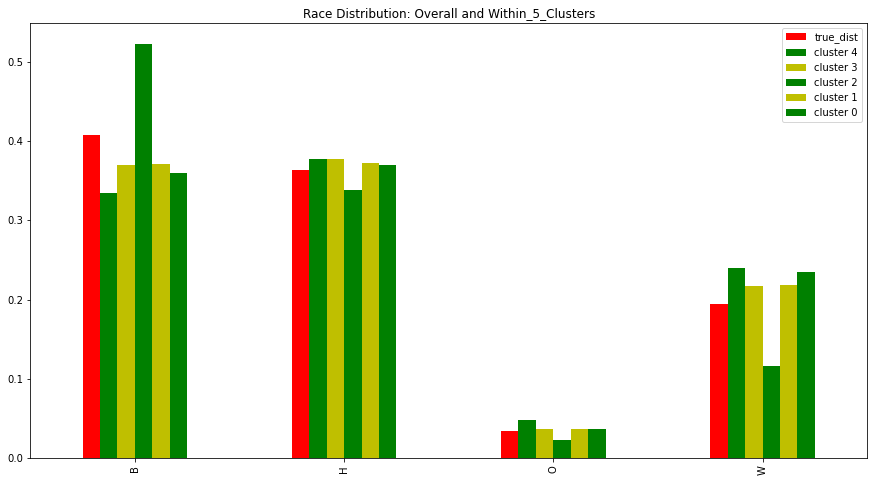

In [17]:
plot_distribution(result_df)

In [18]:
#plot cluster

rnd_indices = np.random.choice(208260, size=10000)

X = arrest_feature_df.values.tolist()
rnd_X = [X[i] for i in rnd_indices]

pred = result_df.grouping.tolist() 
rnd_pred = [pred[i] for i in rnd_indices]

y = result_df.race_label.tolist()
rnd_y = [y[i] for i in rnd_indices]

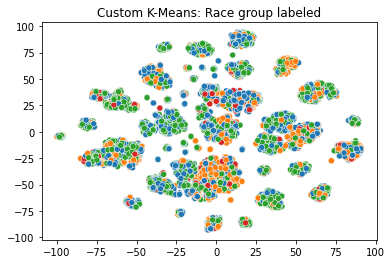

In [19]:
#race group
dims = TSNE(random_state=42).fit_transform(rnd_X)
dim1, dim2 = dims[:, 0], dims[:, 1]
sns.scatterplot(x=dim1, y=dim2, hue=rnd_y, palette='tab10', legend=False)
plt.title('Custom K-Means: Race group labeled');

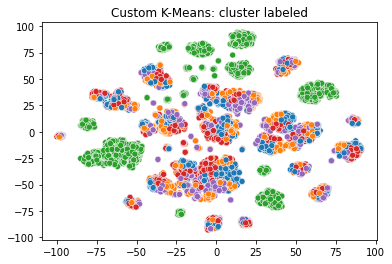

In [20]:
#cluster labeled
sns.scatterplot(x=dim1, y=dim2, hue=rnd_pred, palette='tab10', legend=False)
plt.title('Custom K-Means: cluster labeled');

In [21]:
result_df

,race_label,grouping
0,O,4
1,H,3
2,B,2
3,H,4
4,B,4
...,...,...
208255,H,1
208256,H,2
208257,B,2
208258,H,1


In [16]:
arrest_feature_df['race_label'] = result_df['race_label']
arrest_feature_df['grouping'] = result_df['grouping']
arrest_feature_df

,day,month,hour,minute,area,lat,lon,Age,D,F_x,...,22.0,23.0,24.0,25.0,26.0,27.0,F_y,M_y,race_label,grouping
0,0.7,0.454545,0.166667,0.000000,0.70,0.776950,0.546278,0.329787,0,0,...,1,0,0,0,0,0,1,0,W,0.0
1,0.7,0.454545,0.083333,0.677966,0.85,0.381114,0.810787,0.212766,0,0,...,1,0,0,0,0,0,0,1,O,1.0
2,0.7,0.454545,0.666667,0.254237,0.55,0.399560,0.735059,0.148936,0,1,...,0,0,0,0,0,0,0,1,O,2.0
3,0.7,0.454545,0.000000,0.000000,0.65,0.538501,0.519310,0.372340,0,0,...,1,0,0,0,0,0,0,1,W,1.0
4,0.7,0.454545,0.291667,0.423729,0.35,0.573193,0.432794,0.276596,0,0,...,0,1,0,0,0,0,0,1,W,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208255,0.0,0.000000,0.916667,0.000000,0.60,0.487561,0.867098,0.436170,0,0,...,1,0,0,0,0,0,0,1,B,3.0
208256,0.0,0.000000,0.708333,0.423729,0.75,0.897275,0.609061,0.170213,0,1,...,0,0,0,0,0,0,0,1,H,2.0
208257,0.0,0.000000,0.875000,0.847458,0.55,0.454730,0.687810,0.159574,0,1,...,0,0,0,0,0,0,0,1,B,2.0
208258,0.0,0.000000,0.916667,0.254237,0.50,0.684211,0.987918,0.127660,0,0,...,0,0,1,0,0,0,0,1,B,3.0


In [22]:
result_df.to_csv('clustered_arrest_new.csv')